In [25]:
import itertools
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt

warnings.filterwarnings("ignore")

In [3]:
data = sm.datasets.co2.load_pandas()
y = data.data
y # Bu veriler haftalık. ben aylık olsun istiyorum.

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [4]:
y = y["co2"].resample("MS").mean()
y

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64

In [9]:
# eksik değerleri dolduralım
y.isnull().sum()
y = y.fillna(y.bfill())
y

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64

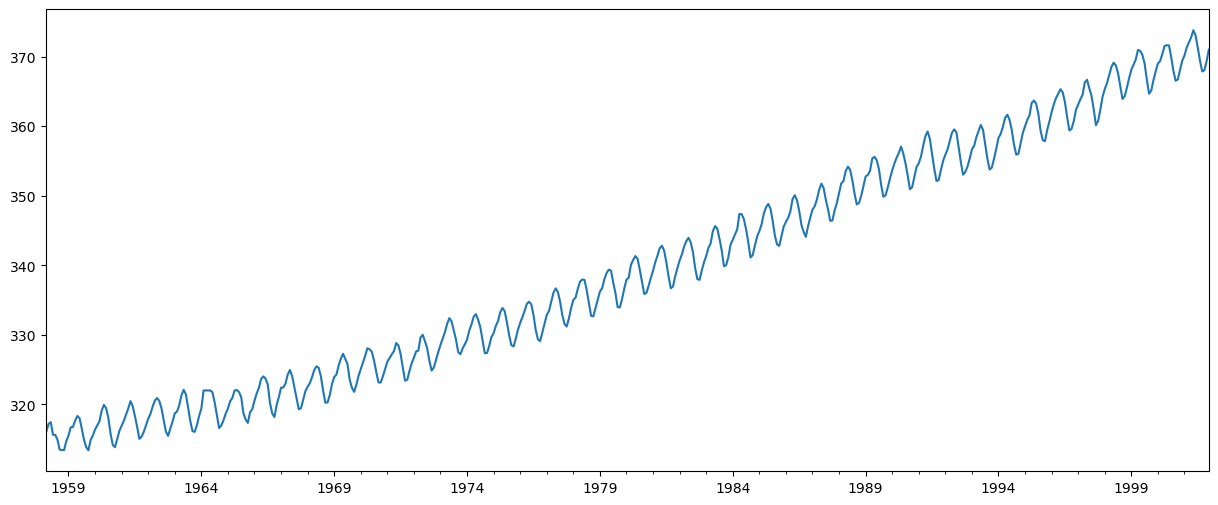

In [12]:
y.plot(figsize=(15,6))
plt.show()

In [19]:
train = y[:"1997-12-01"]
len(train)

test = y["1998-01-01":]
len(test)

48

## Durağanlık testi (Dickey-fuller testi)

In [20]:
def is_stationary(y):

    # "HO: Non-stationary"
    # "H1: Stationary"

    p_value = sm.tsa.stattools.adfuller(y)[1]
    if p_value < 0.05:
        print(F"Result: Stationary (H0: non-stationary, p-value: {round(p_value, 3)})")
    else:
        print(F"Result: Non-Stationary (H0: non-stationary, p-value: {round(p_value, 3)})")

is_stationary(y)

Result: Non-Stationary (H0: non-stationary, p-value: 0.999)


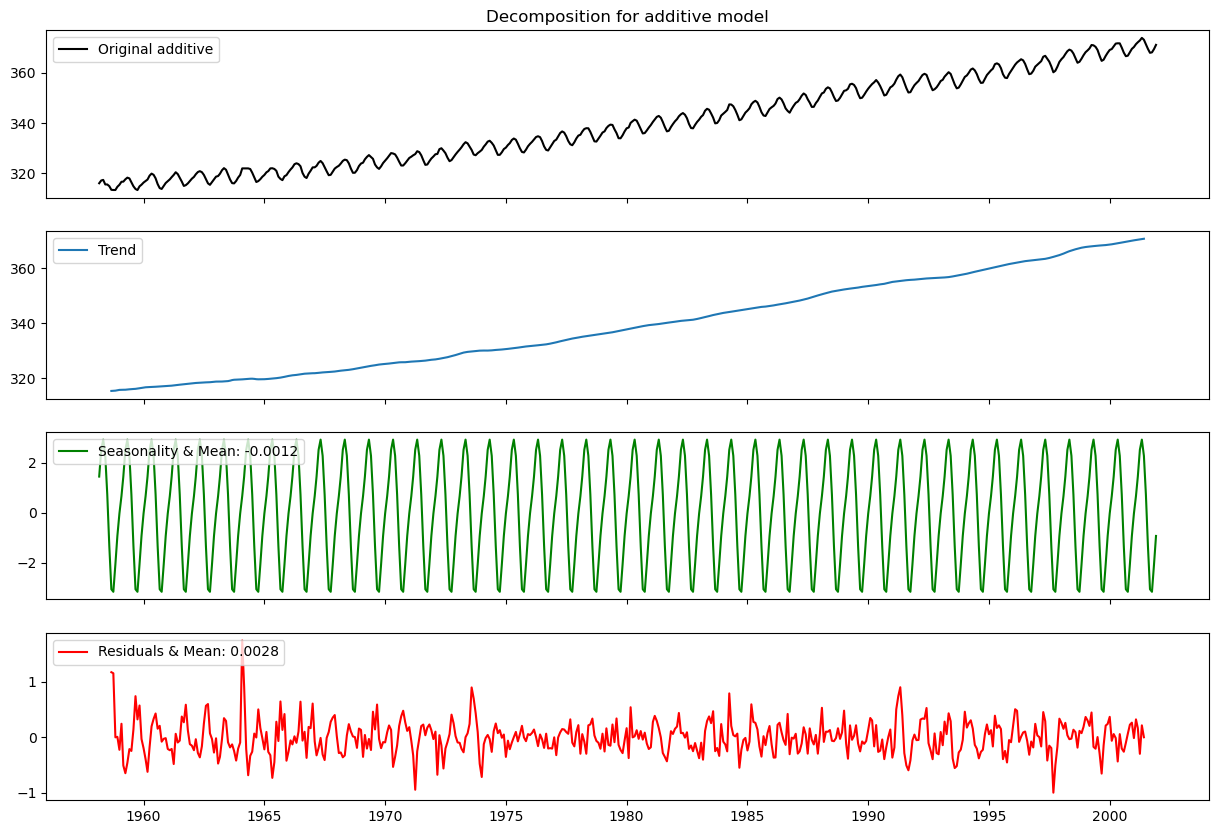

Result: Non-Stationary (H0: non-stationary, p-value: 0.999)


In [24]:
def ts_decompose(y, model="additive", stationary=False):
    result = seasonal_decompose(y, model=model)
    fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)

    axes[0].set_title("Decomposition for " + model + " model")
    axes[0].plot(y, 'k', label='Original ' + model)
    axes[0].legend(loc='upper left')

    axes[1].plot(result.trend, label='Trend')
    axes[1].legend(loc='upper left')

    axes[2].plot(result.seasonal, 'g', label='Seasonality & Mean: ' + str(round(result.seasonal.mean(), 4)))
    axes[2].legend(loc='upper left')

    axes[3].plot(result.resid, 'r', label='Residuals & Mean: ' + str(round(result.resid.mean(), 4)))
    axes[3].legend(loc='upper left')
    plt.show(block=True)

    if stationary:
        is_stationary(y)

ts_decompose(y, stationary=True)



## SES(Single Exponential Smoothing) = sadece level e bakar.

In [26]:
ses_model = SimpleExpSmoothing(train).fit(smoothing_level=0.5)  # modeli böyle kurduk.

In [30]:
y_pred = ses_model.forecast(48) # burada makine öğrenmesindeki gibi fit fonksiyonu yok. 48 ise 48 tane veriyi tahmin et demek.
y_pred

1998-01-01    363.057044
1998-02-01    363.057044
1998-03-01    363.057044
1998-04-01    363.057044
1998-05-01    363.057044
1998-06-01    363.057044
1998-07-01    363.057044
1998-08-01    363.057044
1998-09-01    363.057044
1998-10-01    363.057044
1998-11-01    363.057044
1998-12-01    363.057044
1999-01-01    363.057044
1999-02-01    363.057044
1999-03-01    363.057044
1999-04-01    363.057044
1999-05-01    363.057044
1999-06-01    363.057044
1999-07-01    363.057044
1999-08-01    363.057044
1999-09-01    363.057044
1999-10-01    363.057044
1999-11-01    363.057044
1999-12-01    363.057044
2000-01-01    363.057044
2000-02-01    363.057044
2000-03-01    363.057044
2000-04-01    363.057044
2000-05-01    363.057044
2000-06-01    363.057044
2000-07-01    363.057044
2000-08-01    363.057044
2000-09-01    363.057044
2000-10-01    363.057044
2000-11-01    363.057044
2000-12-01    363.057044
2001-01-01    363.057044
2001-02-01    363.057044
2001-03-01    363.057044
2001-04-01    363.057044


In [29]:
mean_absolute_error(test, y_pred) 

5.706393369643809

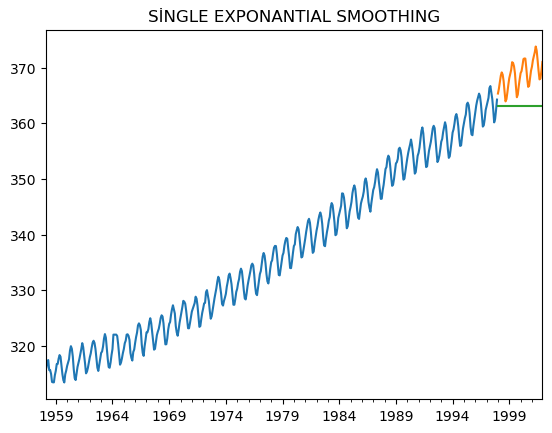

In [32]:
#sonuçları görselleştirelim.
train.plot(title = "SİNGLE EXPONANTIAL SMOOTHING")
test.plot()
y_pred.plot()
plt.show()

Rezalet bir tahmin. çünkü SES modeli trent ve mevsimsel geçişi olan zaman serilerinde iyi çalışmaz.

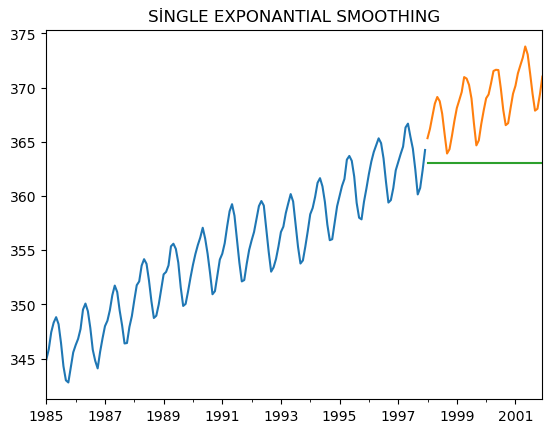

In [33]:
#sonuçları görselleştirelim.
train["1985":].plot(title = "SİNGLE EXPONANTIAL SMOOTHING")
test.plot()
y_pred.plot()
plt.show()

Tekrar tekrar yazmamak adına bu görselleştirmeleri bir fonksiyona atalım.

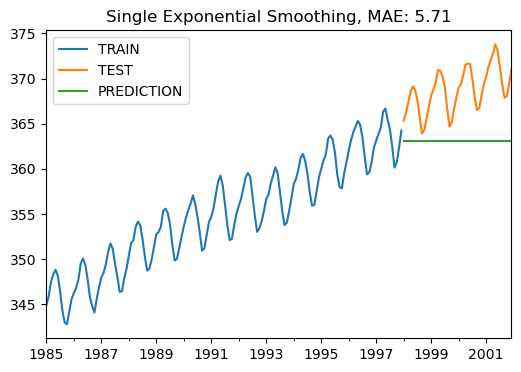

In [34]:
def plot_co2(train, test, y_pred, title):
    mae = mean_absolute_error(test, y_pred)
    train["1985":].plot(legend=True, label="TRAIN", title=f"{title}, MAE: {round(mae,2)}")
    test.plot(legend=True, label="TEST", figsize=(6, 4))
    y_pred.plot(legend=True, label="PREDICTION")
    plt.show()

plot_co2(train, test, y_pred, "Single Exponential Smoothing")



Ben burda alfaya 0.5 verdim. Ama en iyi değer ne? Bunun için hiperparametre optimizasyonu yapıyoruz.

In [35]:
alphas = np.arange(0.8,1,0.01)
alphas

array([0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 ,
       0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [36]:
def ses_optimizer(train, alphas, step=48):

    best_alpha, best_mae = None, float("inf")

    for alpha in alphas:
        ses_model = SimpleExpSmoothing(train).fit(smoothing_level=alpha)
        y_pred = ses_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)

        if mae < best_mae:
            best_alpha, best_mae = alpha, mae

        print("alpha:", round(alpha, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_mae

alphas = np.arange(0.8, 1, 0.01)



In [38]:
ses_optimizer(train,alphas)
best_alpha, best_mae = ses_optimizer(train,alphas)

alpha: 0.8 mae: 4.953
alpha: 0.81 mae: 4.9282
alpha: 0.82 mae: 4.9035
alpha: 0.83 mae: 4.8792
alpha: 0.84 mae: 4.8551
alpha: 0.85 mae: 4.8316
alpha: 0.86 mae: 4.8091
alpha: 0.87 mae: 4.7869
alpha: 0.88 mae: 4.765
alpha: 0.89 mae: 4.7434
alpha: 0.9 mae: 4.7221
alpha: 0.91 mae: 4.7012
alpha: 0.92 mae: 4.6805
alpha: 0.93 mae: 4.6602
alpha: 0.94 mae: 4.6402
alpha: 0.95 mae: 4.6205
alpha: 0.96 mae: 4.6012
alpha: 0.97 mae: 4.5822
alpha: 0.98 mae: 4.5634
alpha: 0.99 mae: 4.5451
best_alpha: 0.99 best_mae: 4.5451
alpha: 0.8 mae: 4.953
alpha: 0.81 mae: 4.9282
alpha: 0.82 mae: 4.9035
alpha: 0.83 mae: 4.8792
alpha: 0.84 mae: 4.8551
alpha: 0.85 mae: 4.8316
alpha: 0.86 mae: 4.8091
alpha: 0.87 mae: 4.7869
alpha: 0.88 mae: 4.765
alpha: 0.89 mae: 4.7434
alpha: 0.9 mae: 4.7221
alpha: 0.91 mae: 4.7012
alpha: 0.92 mae: 4.6805
alpha: 0.93 mae: 4.6602
alpha: 0.94 mae: 4.6402
alpha: 0.95 mae: 4.6205
alpha: 0.96 mae: 4.6012
alpha: 0.97 mae: 4.5822
alpha: 0.98 mae: 4.5634
alpha: 0.99 mae: 4.5451
best_alpha: 0.

In [39]:
ses_model_last = SimpleExpSmoothing(train).fit(smoothing_level=best_alpha)

In [40]:
y_pred_last = ses_model_last.forecast(48)
y_pred_last

1998-01-01    364.231136
1998-02-01    364.231136
1998-03-01    364.231136
1998-04-01    364.231136
1998-05-01    364.231136
1998-06-01    364.231136
1998-07-01    364.231136
1998-08-01    364.231136
1998-09-01    364.231136
1998-10-01    364.231136
1998-11-01    364.231136
1998-12-01    364.231136
1999-01-01    364.231136
1999-02-01    364.231136
1999-03-01    364.231136
1999-04-01    364.231136
1999-05-01    364.231136
1999-06-01    364.231136
1999-07-01    364.231136
1999-08-01    364.231136
1999-09-01    364.231136
1999-10-01    364.231136
1999-11-01    364.231136
1999-12-01    364.231136
2000-01-01    364.231136
2000-02-01    364.231136
2000-03-01    364.231136
2000-04-01    364.231136
2000-05-01    364.231136
2000-06-01    364.231136
2000-07-01    364.231136
2000-08-01    364.231136
2000-09-01    364.231136
2000-10-01    364.231136
2000-11-01    364.231136
2000-12-01    364.231136
2001-01-01    364.231136
2001-02-01    364.231136
2001-03-01    364.231136
2001-04-01    364.231136


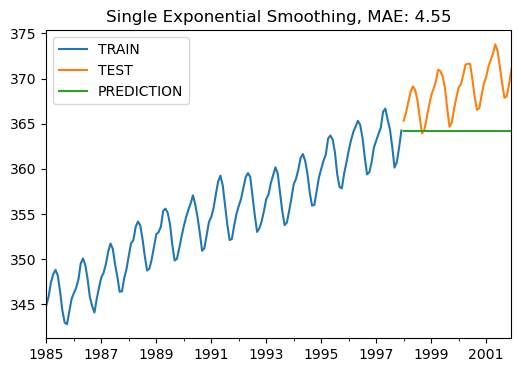

In [41]:
plot_co2(train,test,y_pred_last,"Single Exponential Smoothing")

## DES (Double Exponential Smoothing ) = level + trend e bakar. Yani DES = LEVEL (SES) + TREND

In [43]:
des_model = ExponentialSmoothing(train,trend="add").fit(smoothing_level= 0.5, smoothing_trend = 0.5)

In [44]:
y_pred_des = des_model.forecast(48)

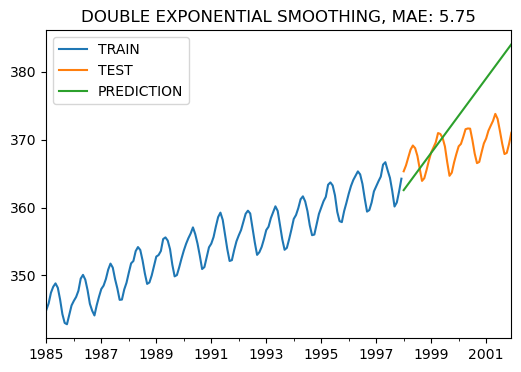

In [45]:
plot_co2(train,test,y_pred_des,"DOUBLE EXPONENTIAL SMOOTHING")

DES için hiperparametre optimizasyonu yapalım.

In [46]:
def des_optimizer(train, alphas, betas, step=48):
    best_alpha, best_beta, best_mae = None, None, float("inf")
    for alpha in alphas:
        for beta in betas:
            des_model = ExponentialSmoothing(train, trend="add").fit(smoothing_level=alpha, smoothing_slope=beta)
            y_pred = des_model.forecast(step)
            mae = mean_absolute_error(test, y_pred)
            if mae < best_mae:
                best_alpha, best_beta, best_mae = alpha, beta, mae
            print("alpha:", round(alpha, 2), "beta:", round(beta, 2), "mae:", round(mae, 4))
    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_mae:", round(best_mae, 4))
    return best_alpha, best_beta, best_mae


In [47]:
alphas = np.arange(0.01, 1, 0.10)
betas = np.arange(0.01, 1, 0.10)

best_alpha, best_beta, best_mae = des_optimizer(train, alphas, betas)

alpha: 0.01 beta: 0.01 mae: 2.3849
alpha: 0.01 beta: 0.11 mae: 2.8294
alpha: 0.01 beta: 0.21 mae: 2.744
alpha: 0.01 beta: 0.31 mae: 2.1723
alpha: 0.01 beta: 0.41 mae: 2.8895
alpha: 0.01 beta: 0.51 mae: 2.49
alpha: 0.01 beta: 0.61 mae: 1.8196
alpha: 0.01 beta: 0.71 mae: 1.7411
alpha: 0.01 beta: 0.81 mae: 2.1932
alpha: 0.01 beta: 0.91 mae: 4.8521
alpha: 0.11 beta: 0.01 mae: 2.4334
alpha: 0.11 beta: 0.11 mae: 3.9118
alpha: 0.11 beta: 0.21 mae: 6.0908
alpha: 0.11 beta: 0.31 mae: 7.2434
alpha: 0.11 beta: 0.41 mae: 8.7305
alpha: 0.11 beta: 0.51 mae: 10.3166
alpha: 0.11 beta: 0.61 mae: 12.0066
alpha: 0.11 beta: 0.71 mae: 13.9772
alpha: 0.11 beta: 0.81 mae: 16.4873
alpha: 0.11 beta: 0.91 mae: 19.655
alpha: 0.21 beta: 0.01 mae: 2.8218
alpha: 0.21 beta: 0.11 mae: 5.7217
alpha: 0.21 beta: 0.21 mae: 8.6538
alpha: 0.21 beta: 0.31 mae: 11.7598
alpha: 0.21 beta: 0.41 mae: 15.5277
alpha: 0.21 beta: 0.51 mae: 20.1474
alpha: 0.21 beta: 0.61 mae: 25.5273
alpha: 0.21 beta: 0.71 mae: 31.2781
alpha: 0.21 be

En iyi parametreleri gördük. Şimdi bu parametrelerle final DES modelimizi oluşturalım.

In [50]:
des_model_last = ExponentialSmoothing(train, trend="add").fit(smoothing_level= best_alpha, smoothing_trend= best_beta)
# Buradaki trend="add" serinin toplamsal seri olduğunu söyler. (mevsimsellik ve artık bileşen trendden bağımsız)

In [51]:
y_pred_last = des_model_last.forecast(48)

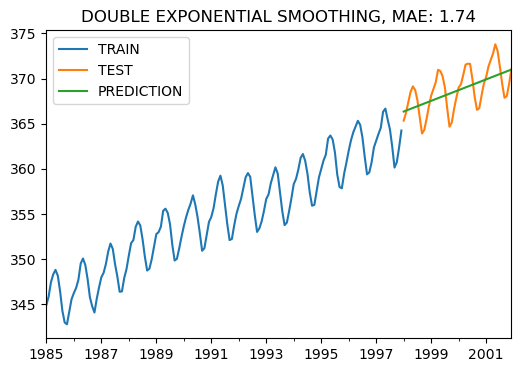

In [52]:
plot_co2(train, test, y_pred_last,"DOUBLE EXPONENTIAL SMOOTHING")

## TES (Triple Exponential Smoothing ) = level + trend + mevsimsellik e bakar. Yani TES = SES + DES + mevsimsellik
## (HOLD-WINTERS)

In [55]:
tes_model = ExponentialSmoothing(train, trend="add", seasonal= "add", seasonal_periods=12).fit(smoothing_level=0.5, 
                                                                                               smoothing_trend= 0.5, 
                                                                                               smoothing_seasonal= 0.5)

# neden seasonal_periods=12 dedik? Çünkü veriyi yıllık düzenledik başta. Periyot 12 de bir tekrarlanıyor.


In [56]:
y_pred_tes = tes_model.forecast(48)

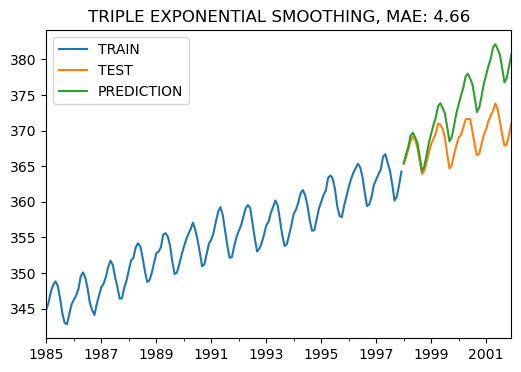

In [57]:
plot_co2(train,test,y_pred_tes,"TRIPLE EXPONENTIAL SMOOTHING")

Bu sonuç SES ve DES e göre gayet iyi. şimdi hiperparametre optimizasyonu yapalım.

In [60]:
alphas = betas = gammas = np.arange(0.20, 1, 0.10)

abg = list(itertools.product(alphas, betas, gammas))
abg # olası tüm kombinasyonları kolay bir şekilde yaptık.

[(0.2, 0.2, 0.2),
 (0.2, 0.2, 0.30000000000000004),
 (0.2, 0.2, 0.4000000000000001),
 (0.2, 0.2, 0.5000000000000001),
 (0.2, 0.2, 0.6000000000000001),
 (0.2, 0.2, 0.7000000000000002),
 (0.2, 0.2, 0.8000000000000003),
 (0.2, 0.2, 0.9000000000000001),
 (0.2, 0.30000000000000004, 0.2),
 (0.2, 0.30000000000000004, 0.30000000000000004),
 (0.2, 0.30000000000000004, 0.4000000000000001),
 (0.2, 0.30000000000000004, 0.5000000000000001),
 (0.2, 0.30000000000000004, 0.6000000000000001),
 (0.2, 0.30000000000000004, 0.7000000000000002),
 (0.2, 0.30000000000000004, 0.8000000000000003),
 (0.2, 0.30000000000000004, 0.9000000000000001),
 (0.2, 0.4000000000000001, 0.2),
 (0.2, 0.4000000000000001, 0.30000000000000004),
 (0.2, 0.4000000000000001, 0.4000000000000001),
 (0.2, 0.4000000000000001, 0.5000000000000001),
 (0.2, 0.4000000000000001, 0.6000000000000001),
 (0.2, 0.4000000000000001, 0.7000000000000002),
 (0.2, 0.4000000000000001, 0.8000000000000003),
 (0.2, 0.4000000000000001, 0.9000000000000001),
 (

In [61]:
def tes_optimizer(train, abg, step=48):
    best_alpha, best_beta, best_gamma, best_mae = None, None, None, float("inf")
    for comb in abg:
        tes_model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12).\
            fit(smoothing_level=comb[0], smoothing_slope=comb[1], smoothing_seasonal=comb[2])
        y_pred = tes_model.forecast(step)
        mae = mean_absolute_error(test, y_pred)
        if mae < best_mae:
            best_alpha, best_beta, best_gamma, best_mae = comb[0], comb[1], comb[2], mae
        print([round(comb[0], 2), round(comb[1], 2), round(comb[2], 2), round(mae, 2)])

    print("best_alpha:", round(best_alpha, 2), "best_beta:", round(best_beta, 2), "best_gamma:", round(best_gamma, 2),
          "best_mae:", round(best_mae, 4))

    return best_alpha, best_beta, best_gamma, best_mae


In [62]:
best_alpha, best_beta, best_gamma, best_mae = tes_optimizer(train, abg)

[0.2, 0.2, 0.2, 0.88]
[0.2, 0.2, 0.3, 0.79]
[0.2, 0.2, 0.4, 0.76]
[0.2, 0.2, 0.5, 0.75]
[0.2, 0.2, 0.6, 0.72]
[0.2, 0.2, 0.7, 0.67]
[0.2, 0.2, 0.8, 0.67]
[0.2, 0.2, 0.9, 0.71]
[0.2, 0.3, 0.2, 0.86]
[0.2, 0.3, 0.3, 0.93]
[0.2, 0.3, 0.4, 0.94]
[0.2, 0.3, 0.5, 0.95]
[0.2, 0.3, 0.6, 1.09]
[0.2, 0.3, 0.7, 1.43]
[0.2, 0.3, 0.8, 1.95]
[0.2, 0.3, 0.9, 1.73]
[0.2, 0.4, 0.2, 1.63]
[0.2, 0.4, 0.3, 1.74]
[0.2, 0.4, 0.4, 1.64]
[0.2, 0.4, 0.5, 1.68]
[0.2, 0.4, 0.6, 2.3]
[0.2, 0.4, 0.7, 4.39]
[0.2, 0.4, 0.8, 11.66]
[0.2, 0.4, 0.9, 4.52]
[0.2, 0.5, 0.2, 2.46]
[0.2, 0.5, 0.3, 2.52]
[0.2, 0.5, 0.4, 1.94]
[0.2, 0.5, 0.5, 1.82]
[0.2, 0.5, 0.6, 1.84]
[0.2, 0.5, 0.7, 3.35]
[0.2, 0.5, 0.8, 4.63]
[0.2, 0.5, 0.9, 3.99]
[0.2, 0.6, 0.2, 3.37]
[0.2, 0.6, 0.3, 3.11]
[0.2, 0.6, 0.4, 0.72]
[0.2, 0.6, 0.5, 1.08]
[0.2, 0.6, 0.6, 1.64]
[0.2, 0.6, 0.7, 2.68]
[0.2, 0.6, 0.8, 8327.83]
[0.2, 0.6, 0.9, 151797145264.8]
[0.2, 0.7, 0.2, 4.72]
[0.2, 0.7, 0.3, 4.56]
[0.2, 0.7, 0.4, 6.58]
[0.2, 0.7, 0.5, 0.64]
[0.2, 0.7, 0.6, 1.9

In [63]:
tes_model_last = ExponentialSmoothing(train, trend="add", seasonal= "add", seasonal_periods=12).fit(smoothing_level= best_alpha, 
                                                                                               smoothing_trend= best_beta, 
                                                                                               smoothing_seasonal= best_gamma)

In [64]:
y_pred_last = tes_model_last.forecast(48)

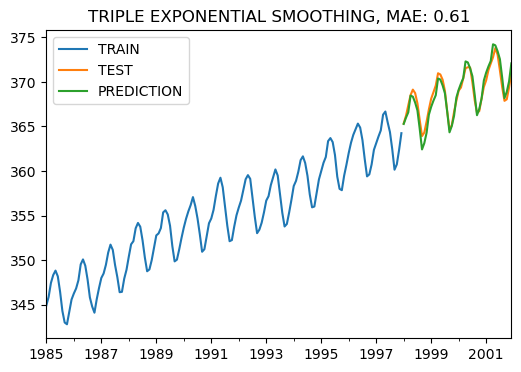

In [65]:
plot_co2(train,test,y_pred_last,"TRIPLE EXPONENTIAL SMOOTHING")